In [56]:
%matplotlib inline

In [57]:
import numpy as np
import pandas as pd
import os
import sys
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing as pp
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [58]:
# Importing Data
os.chdir('E:\Academics\Research\Data\Experimental data\Compression_test\Analysis\Input')
Raw_Data = pd.read_csv('Yield_Iteration2.csv')


In [59]:
#Properties
Properties = ['Youngs_Modulus', 'Yield_Strength','Ultimate_Strength','Ductility']
Property = Properties[1]

In [60]:
#Converting pandas to numpy array
Data = Raw_Data[Raw_Data[Property].notnull()]
Data = Data.values

In [61]:
#Calculate mean
X = Data[:,0:-1]
Y = Data[:,-1]
X_mean = X.mean(axis = 0)
X_std = X.std(axis = 0)
Y_mean = Y.mean()
Y_std = Y.std(axis = 0)

In [62]:
#Scale Data
X = pp.scale(X)
Y = pp.scale(Y)

In [63]:
b = np.arange(len(Data))
print "Original:", b

Original: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [64]:
#Generate divisors of a number
def divisorGenerator(n):
    large_divisors = []
    for i in xrange(1, int(math.sqrt(n) + 1)):
        if n % i == 0:
            yield i
            if i*i != n:
                large_divisors.append(n / i)
    for divisor in reversed(large_divisors):
        yield divisor

In [65]:
#List all possible values of N
L = len(Data)
N = list(divisorGenerator(L))
N = N[1:-1]
N

[2, 4, 5, 8, 10, 20]

In [66]:
class Iteration(object):
    pass

In [67]:
Train_error= []
Test_error = []

In [68]:
np.random.shuffle(b)
for n in N:
    print n
    subs = np.array(np.split(b[:L], n))
    iterations = []
    for i in range(n):
        iteration = Iteration()
        # which step in the N-fold cross validation (which is test, which is train)
        j = range(n)
        del j[i]
        training_indices = np.concatenate(subs[j])
        testing_indices = subs[i]

        # create data subsets
        iteration.X_train = X[training_indices]
        iteration.X_test = X[testing_indices]
        iteration.Y_train = Y[training_indices]
        iteration.Y_test = Y[testing_indices]
        
        X_train = X[training_indices]
        X_test = X[testing_indices]
        Y_train = Y[training_indices]
        Y_test = Y[testing_indices]
        
        # Fit regression model and predict the output
        regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
        Y_train_predict = regressor.fit(X_train, Y_train).predict(X_train)
        Y_test_predict = regressor.fit(X_train, Y_train).predict(X_test)
        
        #Decentering the data
        
        Y_train_predict = Y_train_predict*Y_std + Y_mean
        Y_test_predict = Y_test_predict*Y_std + Y_mean
        
        Y_train = Y_train*Y_std +Y_mean
        Y_test = Y_test*Y_std+Y_mean
        
        #Save the results
        iteration.Y_test = Y_test
        iteration.Y_train = Y_train
        iteration.Y_train_predict = Y_train_predict
        iteration.Y_test_predict = Y_test_predict
        
        #test the model
        iteration.er_train  = np.sqrt(mean_squared_error(Y_train,Y_train_predict,multioutput = 'uniform_average'))
        iteration.er_test  = np.sqrt(mean_squared_error(Y_test,Y_test_predict,multioutput = 'uniform_average'))
        
        # save the results (error in the testing data, error in the training data, etc.)
        iterations.append(iteration)
        
    error_Y_train = np.array([it.er_train for it in iterations])
    error_Y_test = np.array([it.er_test for it in iterations])
    
    error_avg_Y_train = error_Y_train.mean()
    error_avg_Y_test = error_Y_test.mean()
    
    Train_error.append(error_avg_Y_train)
    Test_error.append(error_avg_Y_test)
        

2
4
5
8
10
20


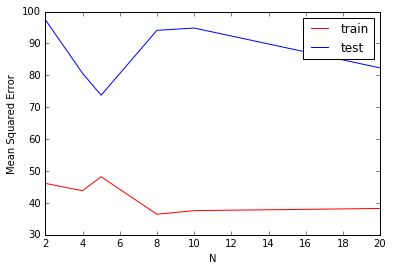

In [69]:
x = N
y = Train_error
z = Test_error

plt.plot(x,y,'r-',label = 'train')
plt.plot(x,z,'b-', label = 'test')
plt.xlabel('N')
plt.ylabel('Mean Squared Error')

plt.legend()

plt.show()